<a href="https://colab.research.google.com/github/catSushiRoll/PCB_QualityControl/blob/main/%5BKP%5D_Train_QC_PCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Dataset for QC


##Load Dataset from google drive
Optional, if the dataset is from roboflow in download code form, no need to mount from drive. After running the Load Dataset, we'll have temporary file, zip it to g-drive due to time efficiency

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CUSTOM TRAIN!!!

### Install Yolov8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

###Load Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iceMajZFDts6O7soFYI0")
project = rf.workspace("workspace-pyibe").project("merge_34")
version = project.version(5)
dataset = version.download("yolov8")


In [8]:
!ls /content/merge_34-5/train/images |wc -l
!ls /content/merge_34-5/valid/images |wc -l
!ls /content/merge_34-5/test/images |wc -l

1362
140
72


In [ ]:
!zip -r /content/drive/MyDrive/dataset_KP_W4.zip /content/merge_34-3

###Train

In [9]:
#EDIT THIS SYNTAX BEFORE RUNNING IT!!!!
!yolo task=detect mode=train model=yolov8n.pt data='/content/merge_34-5/data.yaml' epochs=100

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/merge_34-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=

In [ ]:
!zip -r /content/drive/MyDrive/w5_runs_merging_yolov8_100.zip /content/runs

## Results

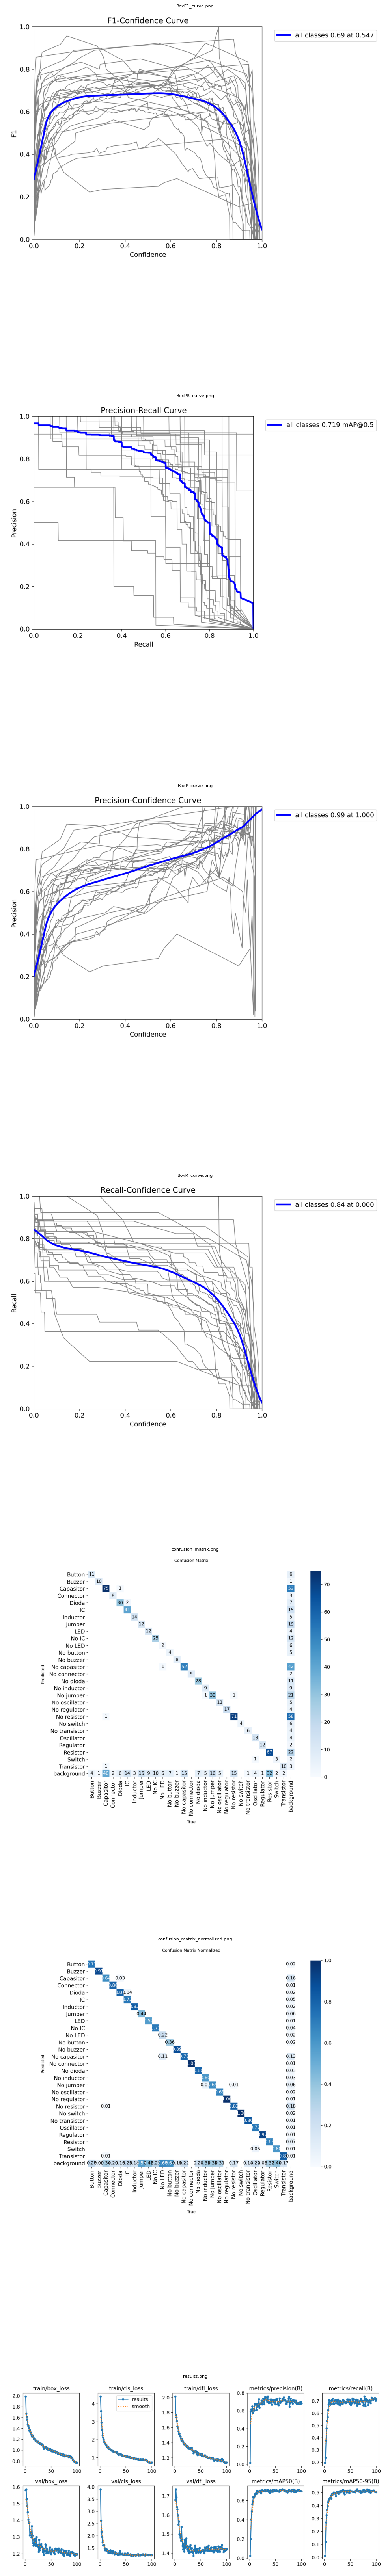

In [12]:
import matplotlib.pyplot as plt
import cv2
import os

image_folder = '/content/runs/detect/train'
image_extension = '.png'
png_files = [f for f in os.listdir(image_folder) if f.endswith(image_extension)]
png_files.sort()

if not png_files:
    print(f"Tidak ada gambar {image_extension} ditemukan di folder {image_folder}")
elif len(png_files) > 25:
    print(f"Terlalu banyak gambar ({len(png_files)}) ditemukan. Menampilkan 25 gambar pertama.")
    png_files = png_files[:25]

num_images = len(png_files)

if num_images > 0:
    cols = min(1, num_images)
    rows = (num_images + cols - 1) // cols

    plt.figure(figsize=(cols * 10, rows * 10))

    for i, file_name in enumerate(png_files):
        file_path = os.path.join(image_folder, file_name)
        img = cv2.imread(file_path)

        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img_rgb)
            plt.title(file_name, fontsize=8)
            plt.axis('off')
        else:
            print(f"Gagal memuat gambar: {file_name}")

    plt.tight_layout()
    plt.show()

In [50]:
import matplotlib.pyplot as plt
import cv2
import os
def plotting(input):
  image= cv2.imread(input)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(10, 6))
  plt.imshow(image_rgb)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

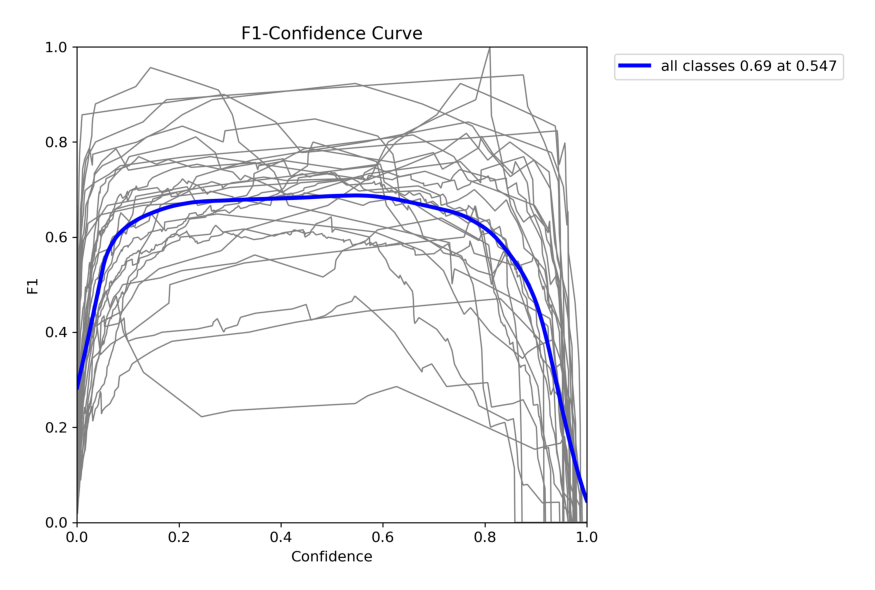

In [51]:
plotting("/content/runs/detect/train/BoxF1_curve.png")

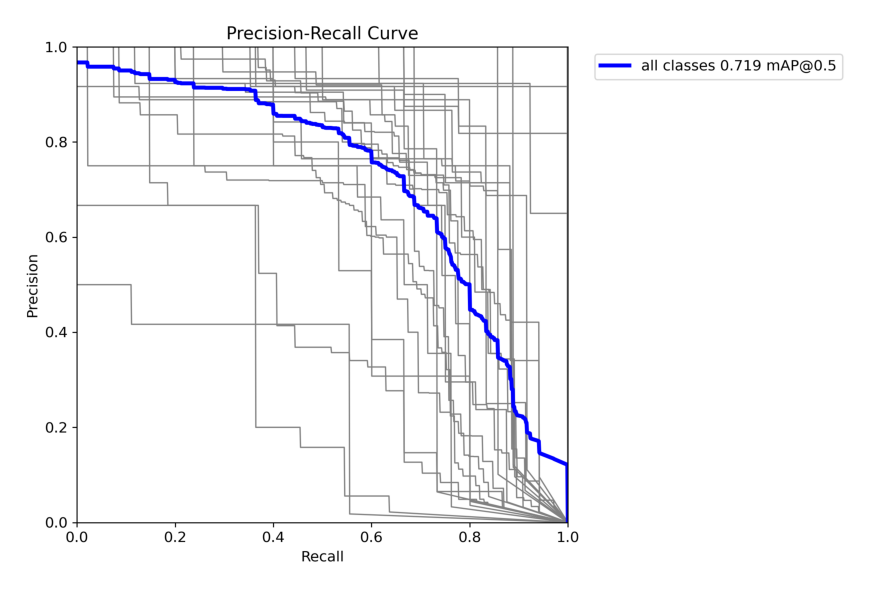

In [52]:
plotting("/content/runs/detect/train/BoxPR_curve.png")

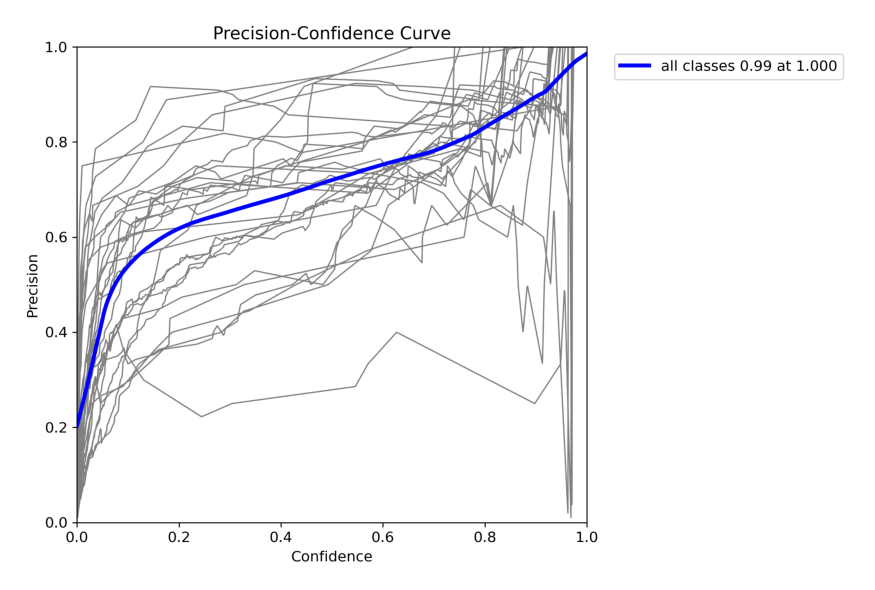

In [53]:
plotting("/content/runs/detect/train/BoxP_curve.png")

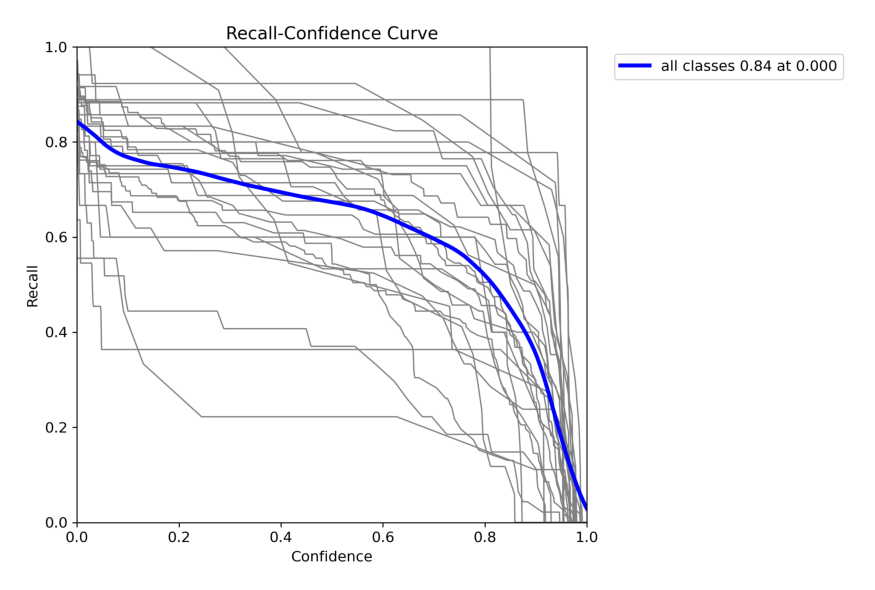

In [56]:
plotting("/content/runs/detect/train/BoxR_curve.png")

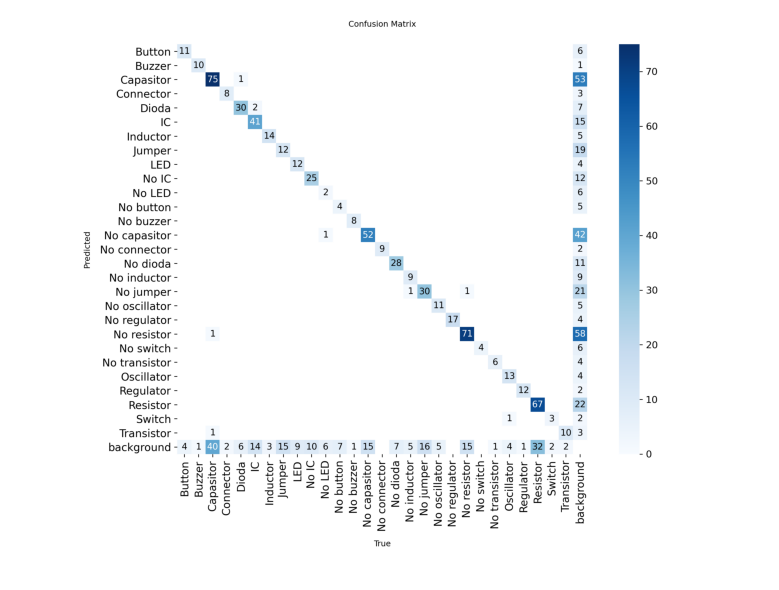

In [55]:
plotting("/content/runs/detect/train/confusion_matrix.png")

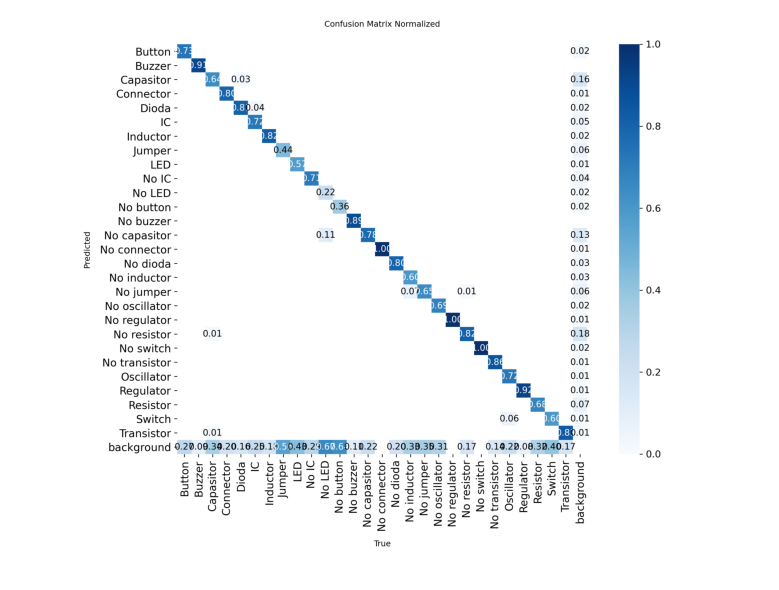

In [57]:
plotting("/content/runs/detect/train/confusion_matrix_normalized.png")

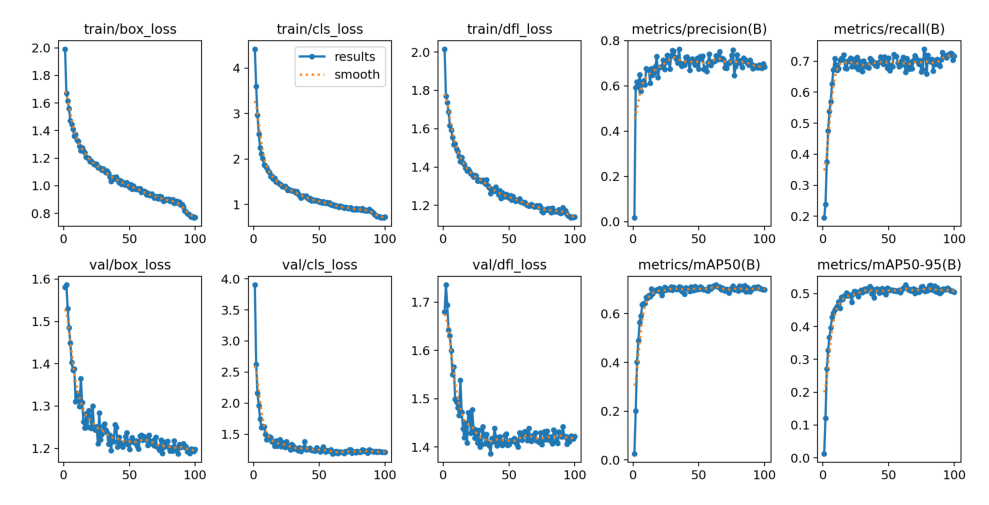

In [54]:
plotting("/content/runs/detect/train/results.png")

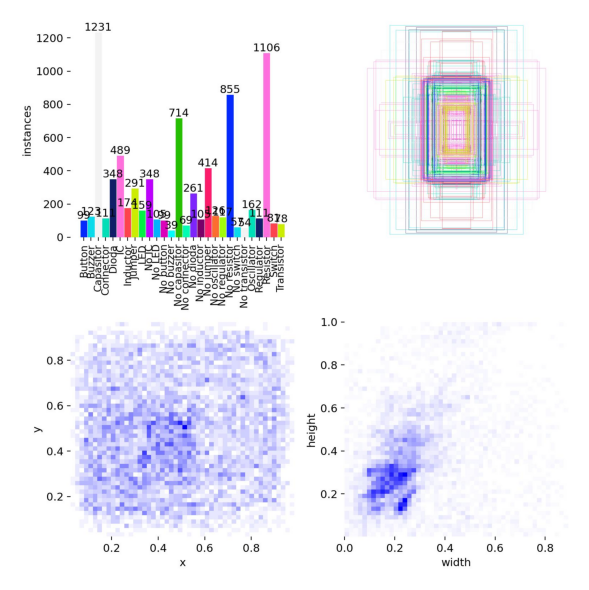

In [58]:
plotting("/content/runs/detect/train/labels.jpg")

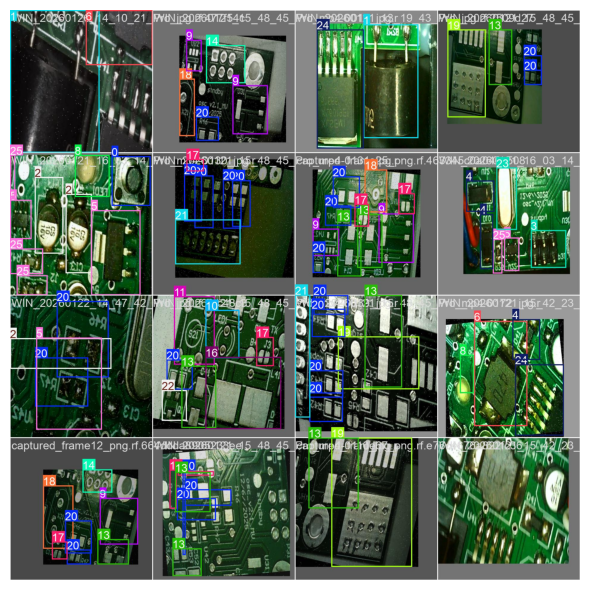

In [60]:
plotting("/content/runs/detect/train/train_batch7742.jpg")

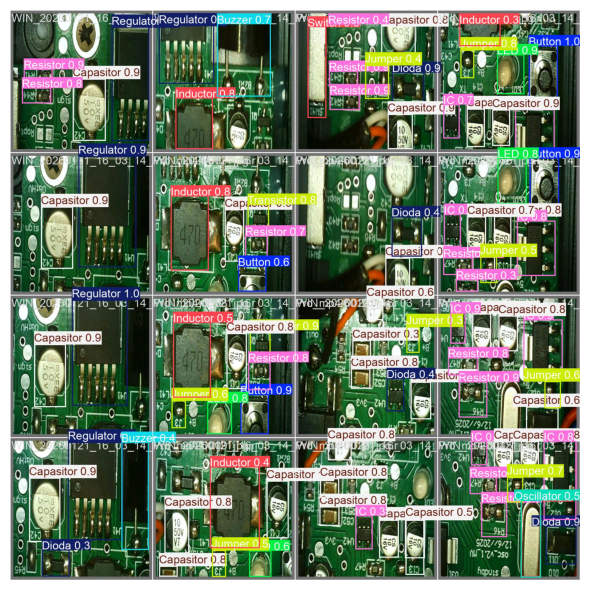

In [59]:
plotting("/content/runs/detect/train/val_batch2_pred.jpg")